In [17]:
!pip install xgboost

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [19]:
data = pd.read_csv("Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
for column in data.columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print("\n")

Unique values in column 'step':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 23

1. Data cleaning including missing values, outliers and multi-collinearity.

   Checking for Missing Values and summing them per column

In [21]:
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Checking for Outliners in the dataset by Plotting BoxPlot

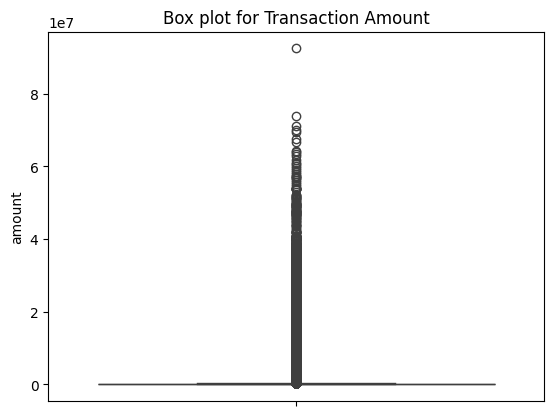

In [22]:
sns.boxplot(data['amount'])
plt.title("Box plot for Transaction Amount")
plt.show()


Cleaning the data and removing the unnecessary data items and changing the non-numerical to numerical type.

Convert categorical 'type' into numerical using Label Encoding


In [24]:
#removing the unneccessary data
df = data.drop(columns=['nameOrig', 'nameDest'])

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [25]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


Check for multi-collinearity using correlation matrix

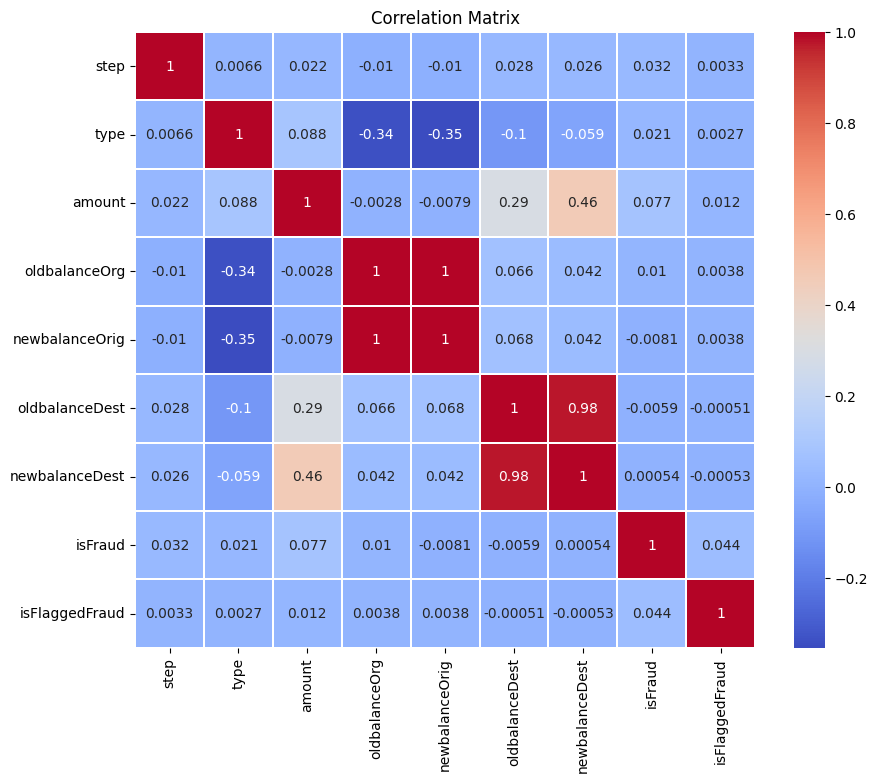

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

In [27]:
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df['isFraud']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. XGBoost is a highly flexible and powerful machine learning model, especially effective in handling large, complex datasets with various types of features. It offers fast execution, advanced regularization techniques to prevent overfitting, and robust handling of missing data, making it a top choice for many predictive modeling tasks, especially in fraud detection and financial modeling.

In [30]:
xgb = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    objective='binary:logistic', 
    eval_metric='auc', 
    use_label_encoder=False
)

xgb.fit(X_train,y_train)

C:\Users\Mohith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

3. Feature Selection:

Begin by removing irrelevant columns (e.g., nameOrig, nameDest) which are customer identifiers and won’t contribute to fraud prediction.
Use domain knowledge (e.g., large amount in CASH-OUT or TRANSFER may indicate fraud) and feature importance techniques like SHAP values or feature importance from tree-based models to select key variables.
The variables to consider include: step, type, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest.

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.81      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



4. Model Performance:
Performance of the model can be demonstrated using metrics such as:

Accuracy: (Not ideal for imbalanced data)
Precision, Recall, F1-Score: Useful to assess how well the model is detecting fraud.
AUC-ROC Curve: Measures the trade-off between true positive and false positive rates

In [33]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9988413601171069


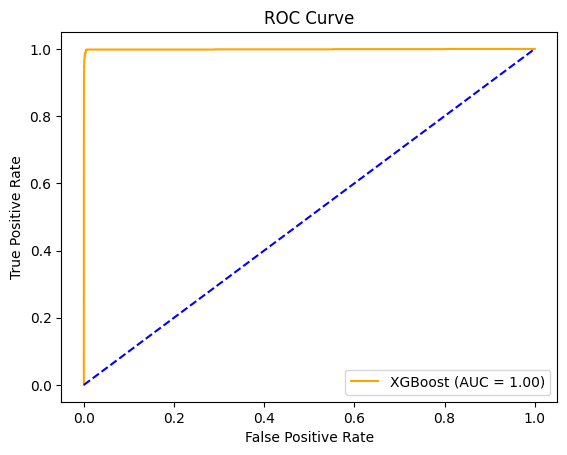

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='orange', label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


5. Key Factors Predicting Fraudulent Transactions:
Based on feature importance, factors that might predict fraud could include:

amount: Higher transaction amounts are more likely to be flagged as fraudulent.
type: Certain transaction types (e.g., CASH-OUT, TRANSFER) may be more associated with fraud.
oldbalanceOrg and newbalanceOrig: Large balance changes without an obvious reason may signal fraud.

6. Do These Factors Make Sense?

These factors make sense in real-world financial fraud detection. Large transactions or sudden balance changes, especially with certain transaction types like CASH-OUT, are classic indicators of fraud.
If they don't make sense, you would need to re-evaluate the features, possibly engineering new ones based on domain expertise.

7. Prevention Actions for the Company:

Monitor high-risk transactions: Implement real-time monitoring for large transactions, especially CASH-OUT and TRANSFER types.
Limit transaction amounts: Flag or block transactions over a certain threshold until manually verified.
Customer authentication: Strengthen multi-factor authentication for high-value transactions or those showing unusual behavior.

In [35]:
print("Feature Importance:")
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance)

Feature Importance:
          Feature  Importance
6  newbalanceDest    0.309976
4  newbalanceOrig    0.239195
3   oldbalanceOrg    0.235679
2          amount    0.065023
5  oldbalanceDest    0.052664
1            type    0.052277
0            step    0.045186


8. Determine If Actions Work:

A/B Testing: Divide transactions into two groups—those where the prevention measures are applied and those where they aren’t—and measure the difference in fraudulent activity.
Key Metrics: Track metrics such as fraud detection rate, false positive rate, and customer satisfaction (to ensure legitimate transactions aren’t unnecessarily flagged).
Data Analysis Post-Implementation: Compare the number of fraudulent transactions and the impact of preventive measures using statistical analysis.